# **CENTRALITY MEASUREMENT**


**Implement Betweenness Centrality in Python.**





> **Input:** adjacency matrix


> **Output:** a list or vector of centrality values







Import Library


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Creating Graph**

Input: adjacency matrix


In [2]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
mat_size = len(A)
print("Graph of Size", mat_size,":")
print(A)

Graph of Size 9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


**Initializing Graphs and Matrices:**

In [3]:
# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_matrix(A)

# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Calculate Step Matrix for A[pow_size]:**

In [4]:
# Calculate the steps in between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

[[0. 1. 1. 1. 2. 2. 3. 3. 4.]
 [1. 0. 1. 2. 3. 3. 4. 4. 5.]
 [1. 1. 0. 1. 2. 2. 3. 3. 4.]
 [1. 2. 1. 0. 1. 1. 2. 2. 3.]
 [2. 3. 2. 1. 0. 1. 1. 1. 2.]
 [2. 3. 2. 1. 1. 0. 1. 1. 2.]
 [3. 4. 3. 2. 1. 1. 0. 1. 1.]
 [3. 4. 3. 2. 1. 1. 1. 0. 2.]
 [4. 5. 4. 3. 2. 2. 1. 2. 0.]]


Get the maximum value in the step_matrix:

In [5]:
pow_size = int(step_mat.max())+1

CLAIM: The maximum no. in the step matrix will be the A_powers iteration when the values (except in the diagonal) would be greater than zero everytime

In [6]:
# Get a list of all powers of A up through the fifth power.
# We need to stop when all entries are positive
#A_powers = [np.linalg.matrix_power(A,m) for m in [1,2,3,4,5]]
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

In [7]:
A_powers

[array([[0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0]]), array([[3, 1, 2, 1, 1, 1, 0, 0, 0],
        [1, 2, 1, 2, 0, 0, 0, 0, 0],
        [2, 1, 3, 1, 1, 1, 0, 0, 0],
        [1, 2, 1, 4, 1, 1, 2, 2, 0],
        [1, 0, 1, 1, 4, 3, 2, 2, 1],
        [1, 0, 1, 1, 3, 4, 2, 2, 1],
        [0, 0, 0, 2, 2, 2, 4, 2, 0],
        [0, 0, 0, 2, 2, 2, 2, 3, 1],
        [0, 0, 0, 0, 1, 1, 0, 1, 1]]), array([[ 4,  5,  5,  7,  2,  2,  2,  2,  0],
        [ 5,  2,  5,  2,  2,  2,  0,  0,  0],
        [ 5,  5,  4,  7,  2,  2,  2,  2,  0],
        [ 7,  2,  7,  4,  9,  9,  4,  4,  2],
        [ 2,  2,  2,  9,  8,  9, 10,  9,  2],
        [ 2,  2,  2,  9,  9,  8, 10,  9,  2],
        [ 2,  0,  2,  4, 10, 10,  6,  8,  4],
        [ 

Compute the sigma values for nodes i and j, with no middle node considered:

In [8]:
# Define a matrix. Next, we will fill it up entry by entry:
sigma = np.zeros((mat_size,mat_size))
sigma

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

CLAIM: The length of a shortest path from i to j is the smallest m such that the i,j entry of A^m is nonzero. Therefore, the number of shortest paths from i to j is the i,j entry of A^m for this particular m.
use a nested loop to build sigma. Also keep track of the minimal lengths for each pair of nodes.

In [9]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

Now compute the other terms, which depend on one node at a time. So, let's repeat the above calculation with node j isolated from the rest of the graph, then subtract.

In [11]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

Define a function that takes a node number and returns its betweenness centrality value!

**=== BETWEENNESS CENTRALITY ===**

In [12]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

**CALCULATE BETWEENNESS CENTRALITY**

In [13]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Betweenness Centralities of the Graph: \n", betweennessCentralityValues)


Betweenness Centralities of the Graph: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]


**CONVERT USING NETWORKX**

Calculate Betweenness Centrality using NetworkX.

We want to compare the result with and without Networkx Library.

In [14]:
# Converting the graph to a NetworkX Graph:
H = nx.from_numpy_matrix(A)

In [15]:
print("----------------------------------------------------------------------------------")
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Calculated Betweenness Centralities: \n", betweennessCentralityValues)
print("\nNetworkX Betweenness Centralities: \n", nx.betweenness_centrality(H, normalized=False).values())


----------------------------------------------------------------------------------
Calculated Betweenness Centralities: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

NetworkX Betweenness Centralities: 
 dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])


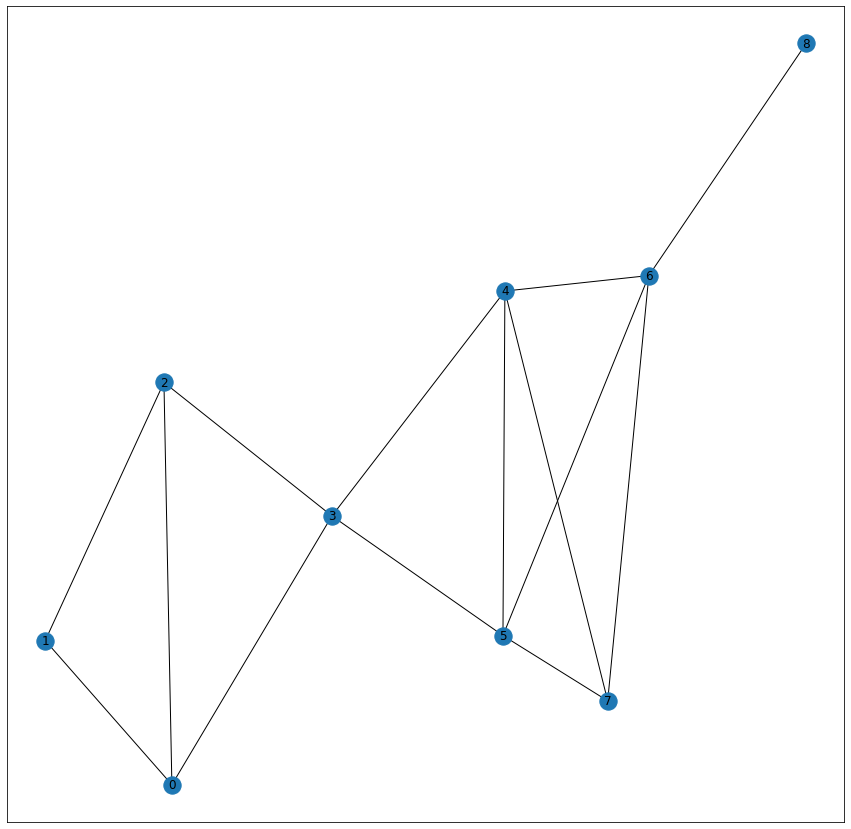

In [16]:
plt.figure(figsize =(15, 15)) 
nx.draw_networkx(temp_Graph, with_labels = True) 